# VISUALISING LINEAR RELATIONSHIPS ACROSS DATASETS

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pollution_data = pd.read_csv("../Datasets/UFOPOLLUTANTS.csv")
pollution_data = pollution_data[:1001]

Sometimes, when working with bivariate plots, it is not clear as to how exactly one variable varies with respect to another. Thus, it becomes easier to study the variation in one variable with respect to another independent variable. In statistics, this is called the regression plot.

Let us first look at the lmplot() function, a function in seaborn used to visualize a linear relationship as determined through regression. Maybe this will give us more clarity about pollutants data.

The lmplot() function, a function in seaborn used to visualize a linear relationship as determined through regression. Here the plot is between the 'CO.1st.Max.Value' and 'NO2.1st.Max.Value'.

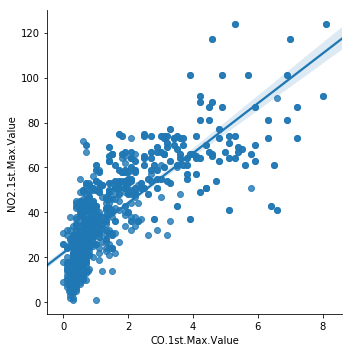

In [4]:
sns.lmplot( x = "CO.1st.Max.Value",
            y = "NO2.1st.Max.Value",
            data = pollution_data)

plt.show()

From the above plot it can be seen that there is a relationship between CO.1st.Max.Value and NO2.1st.Max.Value. The blue colour around the regression line shows the confidence interval of the data. Where the the colour strip is converging there the confidence interval is smaller and viceversa.

#### Adding Jitter to a scatterplot
We try to see if there is a correlation between the time of the day when O3 levels are highest and the O3 Air Quality Index (AQI). The higher the value of AQI, the greater the likelihood of people being adversely affected by the pollutant.

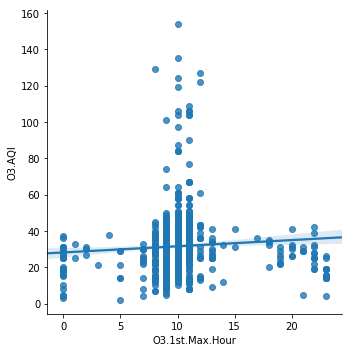

In [5]:
sns.lmplot( "O3.1st.Max.Hour",
            "O3.AQI",
            data = pollution_data)

plt.show()

The relationshiop is clearly not linear as the regression line is nearly flat. However, there is a pattern visible here.

As O3.AQI takes only certain fixed values, we see that the scatter plot is more like a set of lines rather than a set of points that guides the regression line.

And at around 10 am the O3 AQI is maximum.

#### For a better estimate, we could do one of the below
* add some jitter (noise) to the points (the regression line fit is not affected by this) 
* Consider a statistical analysis of the points, and replace the plot by its central tendency, along with permissible margins

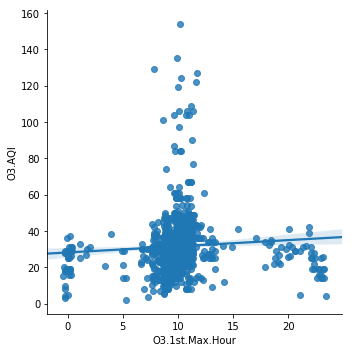

In [6]:
sns.lmplot("O3.1st.Max.Hour",
           "O3.AQI",
           x_jitter = .4,
           y_jitter = 0.1,
           data = pollution_data)

plt.show()

You can see that the added jitter has taken effect in the form of shifting the points a little along the x-axis.

#### Adjust the plot size and aspect ratios
In this plot  with the attribute 'height' and 'aspect'. The size and the aspect ratio of the the plot is set respectively. 

Aspect is the ratio of width:height.

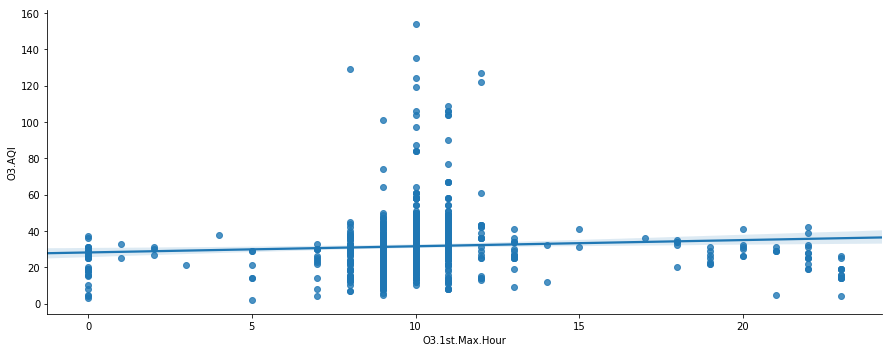

In [7]:
sns.lmplot("O3.1st.Max.Hour",
           "O3.AQI",
           data = pollution_data,
           height = 5,
           aspect = 2.5)

plt.show()

#### The Central Tendency
For the central tendency approach, we need a statistical function that can estimate the mean value of the given set of values. This can be obtained from Numpy library, which is a Python scientific computing package that adds support for large multi dimensional arrays and matrices.

Here, a single point will be plotted for each unique value of x and the point will be at the mean of all points which share that x value.

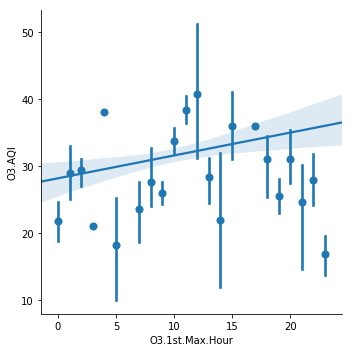

In [8]:
sns.lmplot("O3.1st.Max.Hour",
           "O3.AQI",
           data = pollution_data,
           x_estimator = np.mean)

plt.show()

## Fitting Different kinds of models
**The data we have deal with so far follows linear relationships with respect to the regression line. 
What if the plots follows different order relationships? Can we still use the same method to obtain regression plots?**

lmplot has parameters that can be set to study such distributions. The regression line is then plotted based on the way the distribution is handled, and the curve is a better fit to the distribution.
A few examples of such distributions are parabolic distributions, binary data representations etc.

In such cases, a function called residplot can be used to get a rough sketch to see if the linear regression is appropriate for the distribution. If there are structures in the resulting graph, rather than points spread around the regression line, we need to consider applying an alternative regression method.

### What if we want to compare and contrast more than just two parameters?

lmplot combines regplot() and Facetgrid(), an object that links Pandas DataFrame to a matplotlib figure, which makes it possible to visualise interactions with upto 3 additional categories. The plots can be differentiated by colour/markers, additional rows and columns.

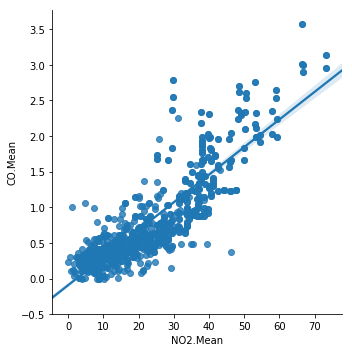

In [9]:
sns.lmplot("NO2.Mean",
           "CO.Mean",
           data = pollution_data)

plt.show()

#### Generate multiple plots based on a 3rd parameter
In the following plot the 'lmplot()' function will generate a separate CO.Mean vs NO2.Mean plot for each value of 'year'.

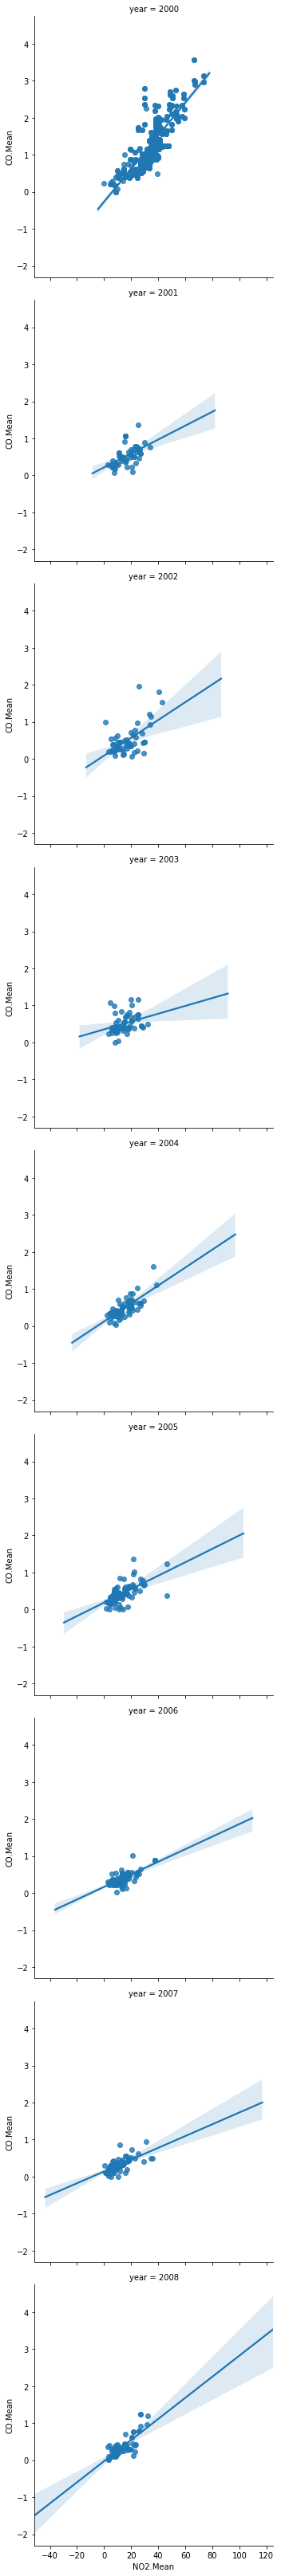

In [10]:
sns.lmplot("NO2.Mean",
           "CO.Mean",
           data = pollution_data,
           row = "year")

plt.show()

#### Get the separate plots in multiple columns on the same row
Just set the 'col' parameter rather than 'row'

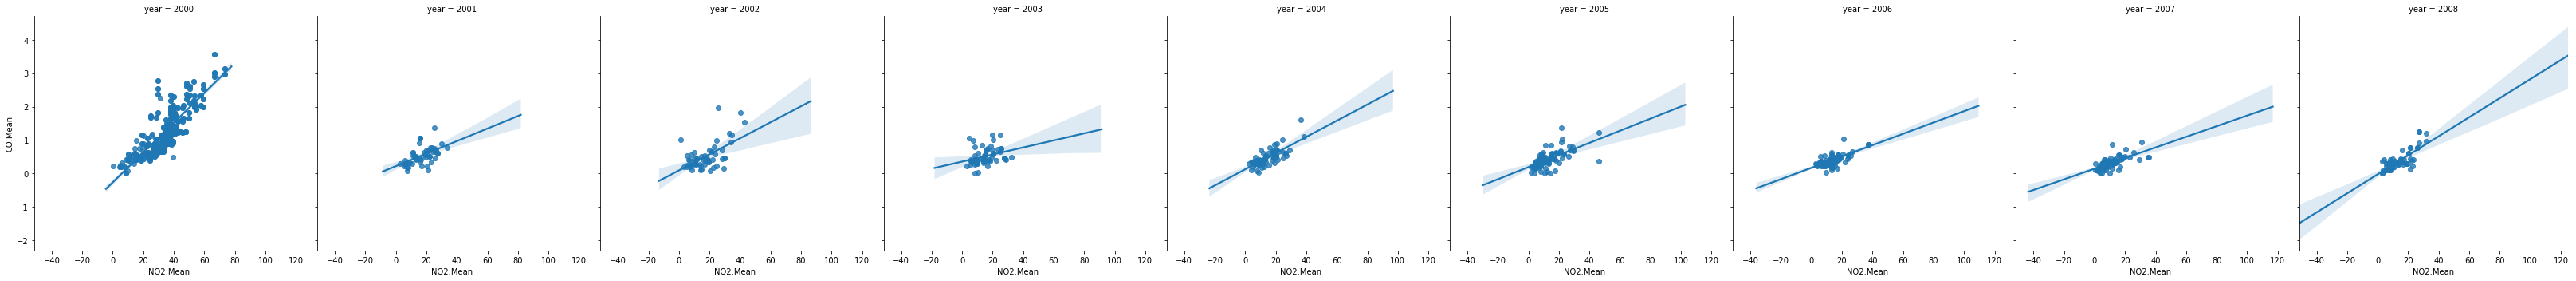

In [11]:
sns.lmplot("NO2.Mean",
           "CO.Mean",
           data = pollution_data,
           col = "year",)

plt.show()

The following operation is similar like the above one but one additional attribute 'hue' is added, and it is set to 'year'. Hue can be considered as dimensions of x and y.

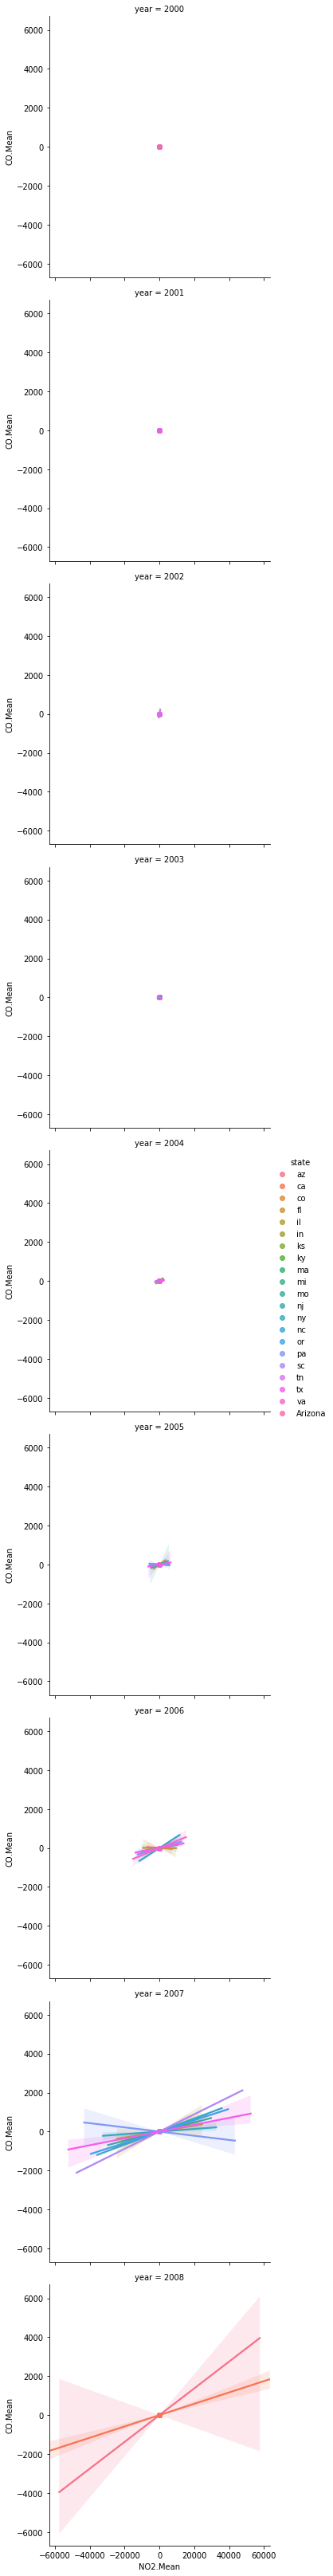

In [12]:
sns.lmplot("NO2.Mean",
           "CO.Mean",
           data = pollution_data,
           row = "year",
           hue = "state")

plt.show()

### The regplot()
This is an alternative to lmplot() but more limited in scope. An lmplot combines a regplot() and a FacetGrid() which allows us to generate multiple regplots on a grid as we have seen. 

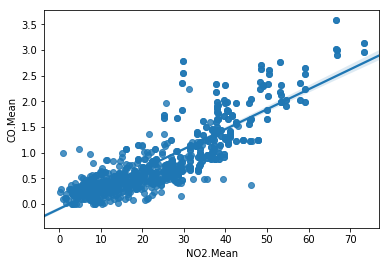

In [13]:
sns.regplot("NO2.Mean",
            "CO.Mean",
            data = pollution_data)

plt.show()

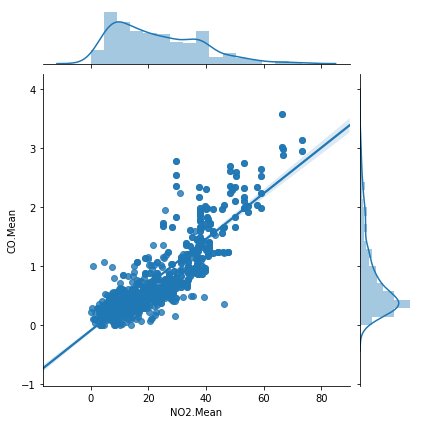

In [14]:
sns.jointplot("NO2.Mean",
              "CO.Mean",
               data = pollution_data,
               kind = "reg")

plt.show()